# Etude sur l'évolution des températures de normandie
## Etude des dataframes
 * analyse des dataframes, tailles, valeurs, etc
 
## Essais sur cartopy
 * représentations cartographiques de la région à étudier
 
## Premiers graphiques
 * représentations graphiques de l'évolution de la température en fonction du temps
 
## Représentations sur folium
 * utilisation de folium pour cartographier la zone
 * utilisation de markers pour représenter les sondes et les températures locales
 
## Proof of Concept
 * 3 propositions de POC:
  * représentation cartographique avec folium
  * représentation graphique simple
  * représentation graphique avec plotly

# Etude des dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv("l-mesuretemprivieres-d-r28.csv", decimal=",")
loc = pd.read_csv("l-reseautemprivieres-d-r28.csv", decimal=",")

temp['date_mesure']= pd.to_datetime(temp['date_mesure'])
#temp["Teau"] = temp.str.replace(",", ".")
#temp["Teau"] = pd.to_numeric(temp["Teau"], downcast="float")

display(temp.tail())
display(loc)

,id_mesure,date_mesure,Teau,id_sonde
398781,398717,2018-10-05 00:00:00,13.666,830
398782,398718,2018-10-05 02:00:00,13.401,830
398783,398719,2018-10-05 04:00:00,13.161,830
398784,398720,2018-10-05 06:00:00,12.968,830
398785,398721,2018-10-05 08:00:00,12.799,830


,id_sonde,lib_sonde,reseau_perenne,lat_wgs84,lon_wgs84,x_lamb93,y_lamb93
0,103.0,Courtone,1,49.12436,0.33661,505618.35,6894896.11
1,104.0,Monne,1,48.94737,0.12035,489124.15,6875779.48
2,105.0,Vie,1,48.90467,0.21240,495694.50,6870792.21
3,108.0,Taute,1,49.22102,-1.27210,388884.58,6910787.09
4,109.0,Barge,1,48.78573,0.14458,490247.91,6857753.06
5,762.0,Souleuvre,1,48.94720,-0.88895,415264.51,6878928.09
6,763.0,See Rousse,1,48.70381,-0.89254,413668.32,6851910.89
7,764.0,Egrenne,1,48.69025,-0.74364,424541.44,6849875.38
8,765.0,Durance,1,48.76697,-0.71439,427093.18,6858294.22
9,766.0,See av,1,48.71074,-1.24009,388167.78,6853996.75


In [2]:
df = pd.merge(temp, loc, how="inner", on="id_sonde", validate="m:1")

display(df)
display(df.describe())

,id_mesure,date_mesure,Teau,id_sonde,lib_sonde,reseau_perenne,lat_wgs84,lon_wgs84,x_lamb93,y_lamb93
0,74,2013-05-29 14:00:00,10.492,104,Monne,1,48.94737,0.12035,489124.15,6875779.48
1,73,2013-05-29 16:00:00,11.127,104,Monne,1,48.94737,0.12035,489124.15,6875779.48
2,75,2013-05-29 18:00:00,11.297,104,Monne,1,48.94737,0.12035,489124.15,6875779.48
3,71,2013-05-29 20:00:00,11.053,104,Monne,1,48.94737,0.12035,489124.15,6875779.48
4,72,2013-05-29 22:00:00,10.907,104,Monne,1,48.94737,0.12035,489124.15,6875779.48
...,...,...,...,...,...,...,...,...,...,...
398781,398717,2018-10-05 00:00:00,13.666,830,Touques T6,0,49.30378,0.14921,492667.49,6915318.10
398782,398718,2018-10-05 02:00:00,13.401,830,Touques T6,0,49.30378,0.14921,492667.49,6915318.10
398783,398719,2018-10-05 04:00:00,13.161,830,Touques T6,0,49.30378,0.14921,492667.49,6915318.10
398784,398720,2018-10-05 06:00:00,12.968,830,Touques T6,0,49.30378,0.14921,492667.49,6915318.10


,id_mesure,Teau,id_sonde,reseau_perenne,lat_wgs84,lon_wgs84,x_lamb93,y_lamb93
count,398786.000000,398786.000000,398786.000000,398786.000000,398786.000000,398786.000000,398786.000000,3.987860e+05
mean,199393.500000,12.270053,734.117647,0.235294,48.906787,-0.420378,449262.184706,6.872996e+06
std,115119.746562,4.390745,229.521242,0.424183,0.214743,0.546719,40766.616078,2.277285e+04
min,1.000000,-5.542000,104.000000,0.000000,48.574980,-1.289900,383842.990000,6.838446e+06
25%,99697.250000,8.668000,815.000000,0.000000,48.780530,-0.637380,434069.300000,6.856782e+06
50%,199393.500000,12.171000,819.000000,0.000000,48.947370,-0.456780,446675.030000,6.875779e+06
75%,299089.750000,15.533000,824.000000,0.000000,49.057050,0.144580,490247.910000,6.887625e+06
max,398786.000000,27.998000,830.000000,1.000000,49.303780,0.296820,501406.800000,6.915318e+06


In [3]:
# lib_sonde correction
df = df.replace(to_replace='Monne  ', value='Monne')
df = df.replace(to_replace='Barge  ', value='Barges')
df = df.replace(to_replace='Ving Bec  ', value='Vingt-Bec')
available_sondes = df.lib_sonde.unique()
print(available_sondes)

['Monne' 'Barges' 'Vingt-Bec' 'Odon T2' 'Odon T4' 'Odon T5' 'Orne T1'
 'Orne T3' 'Orne T2' 'Selune T4' 'Selune T2' 'Selune T5' 'Selune T1'
 'Touques T1' 'Touques T3' 'Touques T4' 'Touques T6']


On remarque ici que sur les 34 sondes initialement présentes dans le csv listant les sondes et leur localisation, seulement 17 sont présentes dans le csv regroupant les températures. Toutes les sondes ne sont peut être pas actives ou fonctionnelles ou notre csv est peut être incomplet. Malgré cela, nous disposons de près de 400000 lignes pour notre analyse, ce qui devrait être suffisant.

# Essais sur cartopy

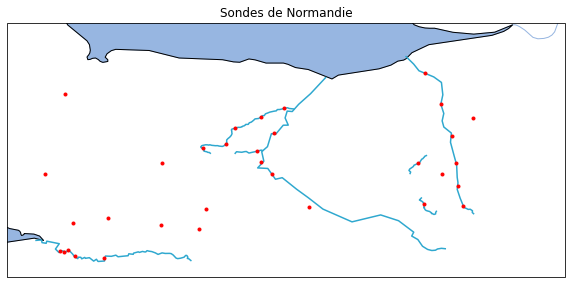

In [4]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

# Csv importation of usefull rivers coordinates   
touques = pd.read_csv("touques.csv", sep = "\t")
selune = pd.read_csv("selune.csv", sep="\t")
orne = pd.read_csv("orne.csv", sep="\t")
odon = pd.read_csv("odon.csv", sep="\t")
monne = pd.read_csv("monne.csv", sep = "\t")
barges = pd.read_csv("barges.csv", sep = "\t")
vingtbec = pd.read_csv("vingtbec.csv", sep = "\t")
   
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-1.5, 0.7, 48.5, 49.5])

ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.plot(touques.lon, touques.lat, color = '#2fa8cf')
ax.plot(selune.lon, selune.lat, color = '#2fa8cf')
ax.plot(orne.lon, orne.lat, color = '#2fa8cf')
ax.plot(odon.lon, odon.lat, color = '#2fa8cf')
ax.plot(monne.lon, monne.lat, color = '#2fa8cf')
ax.plot(barges.lon, barges.lat, color = '#2fa8cf')
ax.plot(vingtbec.lon, vingtbec.lat, color = '#2fa8cf')
# plot all the captors
ax.plot(loc.lon_wgs84, loc.lat_wgs84, '.', color = 'r')
ax.set_title('Sondes de Normandie');


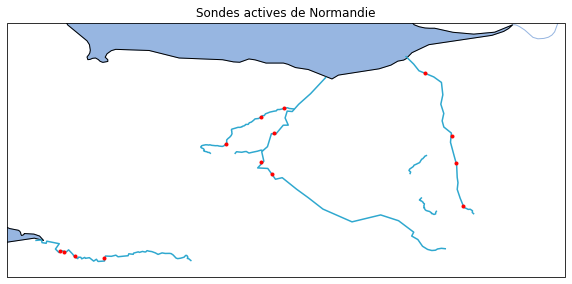

In [5]:
# Dataframe with only usefull captors
loc_to_study = loc[loc.lib_sonde.isin(available_sondes)]
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-1.5, 0.7, 48.5, 49.5])

ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.plot(touques.lon, touques.lat, color = '#2fa8cf', linewidth=1.5)
ax.plot(selune.lon, selune.lat, color = '#2fa8cf')
ax.plot(orne.lon, orne.lat, color = '#2fa8cf')
ax.plot(odon.lon, odon.lat, color = '#2fa8cf')
ax.plot(monne.lon, monne.lat, color = '#2fa8cf')
ax.plot(barges.lon, barges.lat, color = '#2fa8cf')
ax.plot(vingtbec.lon, vingtbec.lat, color = '#2fa8cf')
# plot only the captors with results
ax.plot(loc_to_study.lon_wgs84, loc_to_study.lat_wgs84, '.', color = 'r')
ax.set_title('Sondes actives de Normandie');


En éliminant les sondes ne donnant pas de résultat, on peut se concentrer sur 3 fleuves (La Touques, La Sélune et L'Orne) et sur 4 rivières (L'Odon, La Monne, La Barges et le Vingt-Bec). Il apparait alors que cartopy n'est pas particulièrement adapté à notre étude, c'est pourquoi nous utiliserons folium par la suite.

# Premiers graphiques

In [6]:
# function to get dataframe from a particular sonde and for a particular year
def df_by_sonde_and_year(sonde, year=all):
    if year == all:
        df_to_return = df[(df["lib_sonde"] == sonde)]
    else:
        df_to_return = df[(df["lib_sonde"] == sonde) & (df["date_mesure"].dt.year == year)]
    return df_to_return

# function to plot Temperatures by date (to use with a dataframe with only one sonde)
def plot_by_date(df):
    label = df['lib_sonde'].unique()
    plt.plot_date(df.date_mesure, df.Teau, xdate=True, ydate=False, linestyle='solid', marker='None', label=label[0])
    

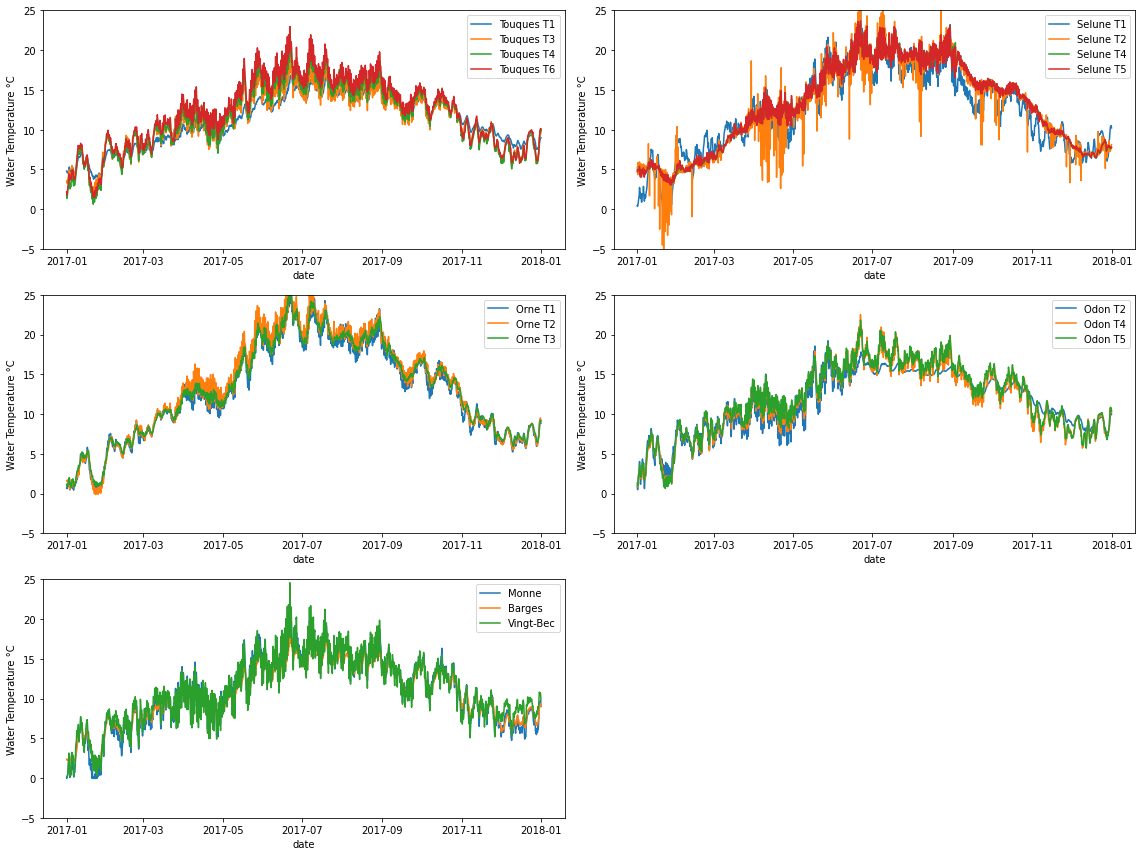

In [7]:
# Touques dataframes for 2017
df_TT6_2017 = df_by_sonde_and_year("Touques T6", 2017)
df_TT4_2017 = df_by_sonde_and_year("Touques T4", 2017)
df_TT3_2017 = df_by_sonde_and_year("Touques T3", 2017)
df_TT1_2017 = df_by_sonde_and_year("Touques T1", 2017)
# Selune dataframes for 2017
df_ST1_2017 = df_by_sonde_and_year("Selune T1", 2017)
df_ST2_2017 = df_by_sonde_and_year("Selune T2", 2017)
df_ST4_2017 = df_by_sonde_and_year("Selune T4", 2017)
df_ST5_2017 = df_by_sonde_and_year("Selune T5", 2017)
# Orne dataframe for 2017
df_OT1_2017 = df_by_sonde_and_year("Orne T1", 2017)
df_OT2_2017 = df_by_sonde_and_year("Orne T2", 2017)
df_OT3_2017 = df_by_sonde_and_year("Orne T3", 2017)
# Odon dataframe for 2017
df_OdT2_2017 = df_by_sonde_and_year("Odon T2", 2017)
df_OdT4_2017 = df_by_sonde_and_year("Odon T4", 2017)
df_OdT5_2017 = df_by_sonde_and_year("Odon T5", 2017)
# Monne dataframe for 2017
df_M_2017 = df_by_sonde_and_year("Monne", 2017)
# Barges dataframe for 2017
df_B_2017 = df_by_sonde_and_year("Barges", 2017)
# Vingt-Bec dataframe for 2017
df_VB_2017 = df_by_sonde_and_year("Vingt-Bec", 2017)


fig = plt.figure(figsize=(16,12))
# Touques subplot
plt.subplot(3, 2, 1)
plot_by_date(df_TT1_2017)
plot_by_date(df_TT3_2017)
plot_by_date(df_TT4_2017)
plot_by_date(df_TT6_2017)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,25])
# Selune subplot
plt.subplot(3, 2, 2)
plot_by_date(df_ST1_2017)
plot_by_date(df_ST2_2017)
plot_by_date(df_ST4_2017)
plot_by_date(df_ST5_2017)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,25])
# Orne subplot
plt.subplot(3, 2, 3)
plot_by_date(df_OT1_2017)
plot_by_date(df_OT2_2017)
plot_by_date(df_OT3_2017)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,25])
# Odon subplot
plt.subplot(3, 2, 4)
plot_by_date(df_OdT2_2017)
plot_by_date(df_OdT4_2017)
plot_by_date(df_OdT5_2017)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,25])
# Odon subplot
plt.subplot(3, 2, 5)
plot_by_date(df_M_2017)
plot_by_date(df_B_2017)
plot_by_date(df_VB_2017)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
axes.set_ylim([-5,25])

plt.tight_layout()
plt.show()

On peut constater que l'évolution des températures est similaire pour toutes les sondes d'une même rivière. Cependant la sonde "Selune T2" semble avoir des variations surprenantes et par moment contraire à l'évolution globale. Peut être cette sonde est-elle défectueuse ou mal positionnée.

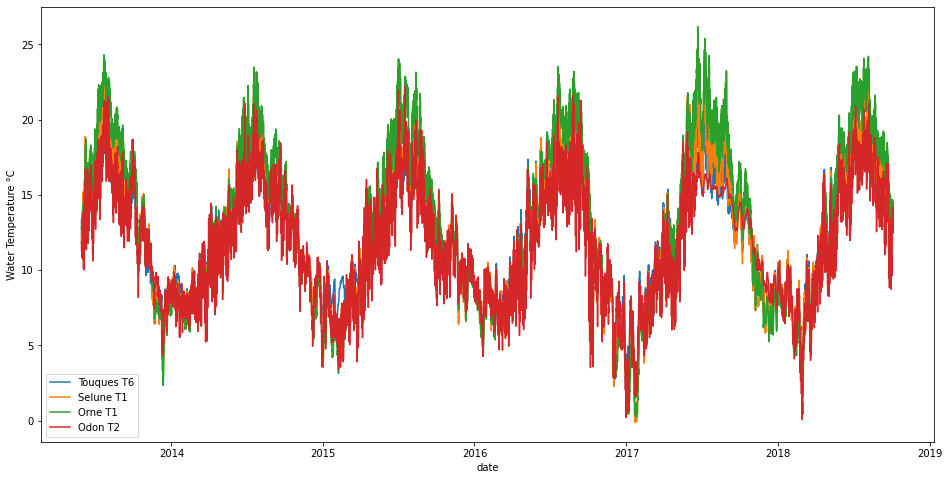

In [8]:
df_TT6 = df_by_sonde_and_year("Touques T6")
df_ST1 = df_by_sonde_and_year("Selune T1")
df_OT1 = df_by_sonde_and_year("Orne T1")
df_OdT2 = df_by_sonde_and_year("Odon T2")

fig = plt.figure(figsize=(16,8))

plot_by_date(df_TT6)
plot_by_date(df_ST1)
plot_by_date(df_OT1)
plot_by_date(df_OdT2)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
plt.show()

L'évolution de la température en fonction du temps pour les différentes sondes est très bruitée. En effet, la température de l'eau va évoluer tout au long de la journée. C'est pourquoi nous allons moyenner les résultats pour chaque journée afin de débruiter la courbe.

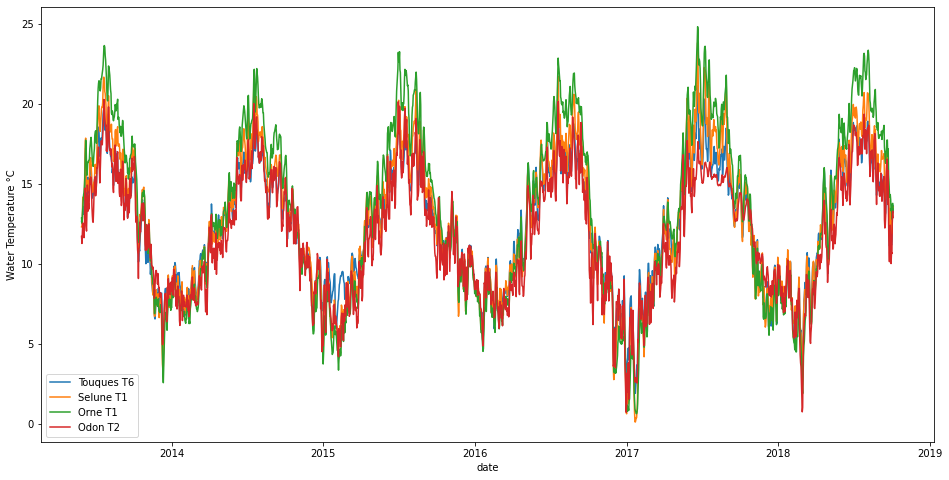

In [9]:
# select part of dataframe to have only informations from some captors
df_TT6 = df_by_sonde_and_year("Touques T6")
df_ST1 = df_by_sonde_and_year("Selune T1")
df_OT1 = df_by_sonde_and_year("Orne T1")
df_OdT2 = df_by_sonde_and_year("Odon T2")
df_M = df_by_sonde_and_year("Monne")
df_B = df_by_sonde_and_year("Barges")
df_VB = df_by_sonde_and_year("Vingt-Bec")

# function to mean the results per day
def plot_mean_by_day(df):
    label = df.lib_sonde.unique()
    df = df.drop(columns=["lib_sonde"])
    df["time"] = df.date_mesure.dt.time
    df["date_mesure"] = df.date_mesure.dt.date
    grouped = df.groupby(df.date_mesure).mean()
    plt.plot_date(grouped.index, grouped.Teau, xdate=True, ydate=False, linestyle='solid', marker='None', label=label[0])
    

fig = plt.figure(figsize=(16,8))

plot_mean_by_day(df_TT6)
plot_mean_by_day(df_ST1)
plot_mean_by_day(df_OT1)
plot_mean_by_day(df_OdT2)
#plot_mean_by_day(df_M)
#plot_mean_by_day(df_B)
#plot_mean_by_day(df_VB)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
plt.show()

Après avoir moyenné sur chaque journée, on peut plus facilement analyser les résultats. Dans un premier temps, on peut déjà constater que les courbes ont une évolution similaire. Ce résultat confirme le bon fonctionnement des sondes. Au cours de l'année et des saisons, la température de l'eau va augmenter suivant des cycles. Même si les températures suivent la même évolution, on peut remarquer que certains capteurs renvoient une température légèrement supérieure que d'autres. Ainsi, l'Orne semble être légèrement plus chaude que les autres rivières pendant l'été.
On peut également remarquer que les températures semblent être légèrement plus faibles lors des hivers de 2017 et 2018 avec des températures moyennes proches de 0°C là où on descendait pas en dessous de 5°C lors des hivers précédents.

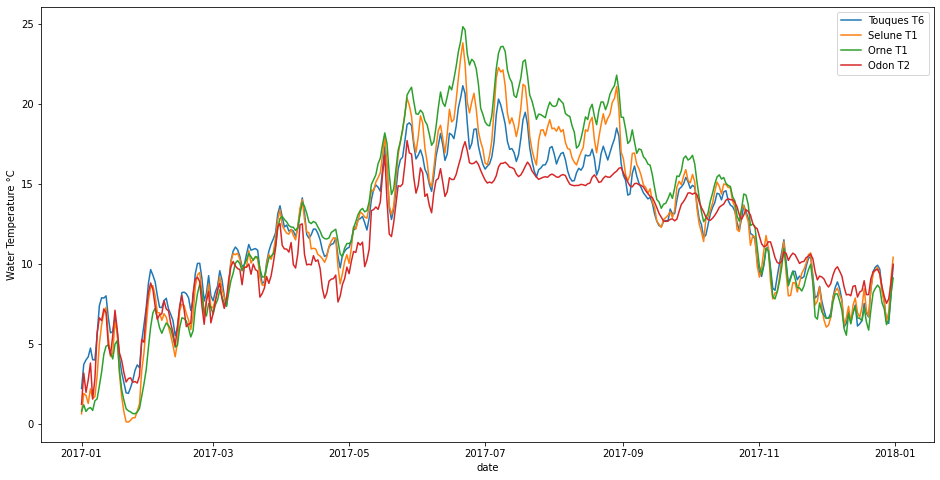

In [10]:
fig = plt.figure(figsize=(16,8))

plot_mean_by_day(df_TT6_2017)
plot_mean_by_day(df_ST1_2017)
plot_mean_by_day(df_OT1_2017)
plot_mean_by_day(df_OdT2_2017)
#plot_mean_by_day(df_M_2017)
#plot_mean_by_day(df_B_2017)
#plot_mean_by_day(df_VB_2017)
plt.xlabel("date")
plt.ylabel("Water Temperature °C")
plt.legend()
axes = plt.gca()
plt.show()

En regardant l'évolution de la température moyenne par jour sur une année on peut clairement remarquer une différence entre les températures d'une rivière à l'autre. Entre Janvier et Juin 2017 puis entre Ocobre et Décembre 2017, les températures des différentes rivières sont très proches les unes des autres (2-3°C d'écart maximum). Cependant, pendant l'été, on observe des différences de température plus flagrantes, pouvant aller jusqu'à 8°C d'écart entre deux cours d'eau. Il apparait donc que l'Odon est plus froid que l'Orne.
T°Odon<T°Touques<T°Sélune<T°Orne

# Représentations sur folium

In [11]:
import folium

# map creation centered on Normandie area, parameters set to False to prevent the map from moving when user is on the map
m = folium.Map(location=[49, -0.56], zoom_start=9, zoom_control=False, scrollWheelZoom=False,
               dragging=False)

tooltip = "Click me!"
loc_to_study = loc[loc.lib_sonde.isin(available_sondes)]
display(type(loc_to_study))
for index, row in loc_to_study.iterrows():
    folium.Marker([row['lat_wgs84'], row['lon_wgs84']], popup=f"<i>{row['lib_sonde']}</i>", tooltip=tooltip).add_to(m)


display(m)

pandas.core.frame.DataFrame

Nous avons donc pu placer les différentes sondes qui apportent des résultats dans le fichier de températures. Il serait donc maintenant intéressant d'associer à chaque point une température en fonction de la date désirée.

In [12]:
from dateutil.relativedelta import relativedelta
import folium
import datetime
import ipywidgets


# function to get dataframe from a particular sonde and for a particular date
def df_by_sonde_and_date(sonde, date=all):
    if date == all:
        df_to_return = df[(df["lib_sonde"] == sonde)]
    else:
        df_to_return = df[(df["lib_sonde"] == sonde) & (df["date_mesure"].dt.date == date)]
    return df_to_return

# add a color for each temperature
def color_temp(temp):
    if temp <= 4:
        color = 'lightblue'
    elif (temp > 4) & (temp <=8):
        color = 'lightgreen'
    elif (temp > 8) & (temp <= 12):
        color = 'green'
    elif (temp > 12) & (temp <= 16):
        color = 'beige'
    elif (temp > 16) & (temp <= 20):
        color = 'orange'
    elif (temp > 20) & (temp <= 24):
        color = 'red'
    elif temp > 24:
        color = 'darkred'
    return color
        

# creation of the map   
def map_plot(date):

    # map creation
    m = folium.Map(location=[49, -0.56], zoom_start=9, zoom_control=False, scrollWheelZoom=False,
               dragging=False)
    
    # selection of only usefull captors
    loc_to_study = loc[loc.lib_sonde.isin(available_sondes)]
    
    for index, row in loc_to_study.iterrows():
        lib_sonde = row['lib_sonde']
        # dataframe with mean values over time of the day
        df_by_sonde = df_by_sonde_and_date(row['lib_sonde'], date)
        df_by_sonde = df_by_sonde.drop(columns=["lib_sonde"])
        df_by_sonde["date_mesure"] = df_by_sonde.date_mesure.dt.date
        grouped = df_by_sonde.groupby(df_by_sonde.date_mesure).mean()
        for index, row in grouped.iterrows(): 
            temp = round(float(row['Teau']), 1)
            tooltip = f"{lib_sonde}\nTemp: {temp}°C" 
            folium.Marker([row['lat_wgs84'], row['lon_wgs84']], 
                      popup=f"{lib_sonde}\nTemp: {temp} °C", 
                      tooltip=tooltip, 
                      icon=folium.Icon(color= color_temp(temp))
                     ).add_to(m)
    
    display(m)

# date slider construction
start_date = datetime.datetime(2013, 5, 29)
end_date = datetime.datetime(2018, 10, 1)
dates = pd.date_range(start_date, end_date, freq='M')
options = [(date.strftime(' %d %b %Y '), date) for date in dates]
selection_slider = ipywidgets.SelectionSlider(
    options=options,
    description='Date',
    orientation='horizontal',
    layout={'width': '500px'},
    continuous_update = False
)
selection_slider


# interaction object with actualisation when user change slider
ipywidgets.interact(map_plot, date=selection_slider)



interactive(children=(SelectionSlider(continuous_update=False, description='Date', layout=Layout(width='500px'…

<function __main__.map_plot(date)>

Voici une première carte permettant à l'utilisateur de comparer les températures journalières moyenne pour les différentes rivières en fonction de la date (pas de 1 mois).

In [13]:
from dateutil.relativedelta import relativedelta
import folium
import datetime
import ipywidgets
import time
import numpy as np


# function to get dataframe from a particular sonde and for a particular date
def df_by_sonde_date_and_time(sonde, date, time_of_the_day):
    date_to_test = datetime.datetime.combine(date, time_of_the_day)
    df_to_return = df[(df["lib_sonde"] == sonde) & 
                      (df["date_mesure"] == date_to_test)]
    return df_to_return

# add a color for each temperature
def color_temp(temp):
    if temp <= 4:
        color = 'lightblue'
    elif (temp > 4) & (temp <=8):
        color = 'lightgreen'
    elif (temp > 8) & (temp <= 12):
        color = 'green'
    elif (temp > 12) & (temp <= 16):
        color = 'beige'
    elif (temp > 16) & (temp <= 20):
        color = 'orange'
    elif (temp > 20) & (temp <= 24):
        color = 'red'
    elif temp > 24:
        color = 'darkred'
    return color
        

# creation of the map   
def map_plot(date, time_of_the_day):
    time_of_the_day = datetime.time(time_of_the_day,0,0)
    # map creation
    m = folium.Map(location=[49, -0.56], zoom_start=9, zoom_control=False, scrollWheelZoom=False,
               dragging=False)
    
    
    loc_to_study = loc[loc.lib_sonde.isin(available_sondes)]
    for index, row in loc_to_study.iterrows():
        
        df_by_sonde = df_by_sonde_date_and_time(row['lib_sonde'], date, time_of_the_day)
        for index, rowtemp in df_by_sonde.iterrows():
            temp = round(float(rowtemp['Teau']), 1)
            tooltip = f"{row['lib_sonde']}\nTemp: {temp}°C"    
            folium.Marker([row['lat_wgs84'], row['lon_wgs84']], 
                      popup=f"<i>{row['lib_sonde']}\nTemp: {temp} °C</i>", 
                      tooltip=tooltip, 
                      icon=folium.Icon(color= color_temp(temp))
                     ).add_to(m)
    
    display(m)

# date slider construction
start_date = datetime.datetime(2013, 5, 30)
end_date = datetime.datetime(2018, 10, 4)
dates = pd.date_range(start_date, end_date, freq='D')
options = [(date.strftime(' %d %b %Y '), date) for date in dates]
selection_slider = ipywidgets.SelectionSlider(
    options=options,
    description='Date',
    orientation='horizontal',
    layout={'width': '500px'},
    continuous_update = False
)
selection_slider

# time slider construction
start_time = 0
end_time = 23

selection_time_slider = ipywidgets.SelectionSlider(
    options=np.arange(start_time, end_time, 2),
    description='Hour',
    orientation='horizontal',
    layout={'width': '500px'},
    continuous_update = False
)
selection_time_slider

ipywidgets.interact(
    map_plot,
    date=selection_slider,
    time_of_the_day=selection_time_slider)



interactive(children=(SelectionSlider(continuous_update=False, description='Date', layout=Layout(width='500px'…

<function __main__.map_plot(date, time_of_the_day)>

Il ne parait pas facile de choisir avec précision une date dans l'année. Nous allons donc essayer de créer des sliders pour sélectionner les jours de l'année avec plus de précision

# Proof Of Concept

In [14]:
from dateutil.relativedelta import relativedelta
import folium
import datetime
import ipywidgets
import time


# function to get dataframe from a particular sonde and for a particular date
def df_by_sonde_date_and_time(sonde, date, time_of_the_day):
    date_to_test = datetime.datetime.combine(date, time_of_the_day)
    df_to_return = df[(df["lib_sonde"] == sonde) & 
                      (df["date_mesure"] == date_to_test)]
    return df_to_return

# add a color for each temperature
def color_temp(temp):
    if temp <= 4:
        color = 'lightblue'
    elif (temp > 4) & (temp <=8):
        color = 'lightgreen'
    elif (temp > 8) & (temp <= 12):
        color = 'green'
    elif (temp > 12) & (temp <= 16):
        color = 'beige'
    elif (temp > 16) & (temp <= 20):
        color = 'orange'
    elif (temp > 20) & (temp <= 24):
        color = 'red'
    elif temp > 24:
        color = 'darkred'
    return color
        

# creation of the map   
def map_plot(year, month, day, time_of_the_day):
    # transform year, month and day values from sliders into date
    date = datetime.date(int(year), int(month), int(day))
    # map creation centered on Normandie with zoom and dragging disabled
    m = folium.Map(location=[49, -0.56], zoom_start=9, zoom_control=False, scrollWheelZoom=False,
               dragging=False)
    
    # dataframe of active sondes
    loc_to_study = loc[loc.lib_sonde.isin(available_sondes)]
    for index, row in loc_to_study.iterrows():
        # dataframe with values from one sonde on one specific day and a specific hour
        df_by_sonde = df_by_sonde_date_and_time(row['lib_sonde'], date, time_of_the_day)
        for index, rowtemp in df_by_sonde.iterrows():
            # round the temperature value to one decimal
            temp = round(float(rowtemp['Teau']), 1)
            # informations printed when putting mouse over marker
            tooltip = f"{row['lib_sonde']}\nTemp: {temp}°C"
            # marker creation
            folium.Marker([row['lat_wgs84'], row['lon_wgs84']], 
                      popup=f"{row['lib_sonde']}\nTemp: {temp} °C", 
                      tooltip=tooltip, 
                      icon=folium.Icon(color= color_temp(temp))
                     ).add_to(m)
    
    display(m)

# function that updates the content month depending of the year selection
def update_month(*args):
    df_month = df[(df["date_mesure"].dt.year == int(year.value))]
    months = df_month['date_mesure'].dt.month.unique().tolist()
    if len(months) == 0:
        months = month_options
    month.options = months
    
# function that updates the content day depending of the month selection
def update_day(*args):
    df_day = df[(df["date_mesure"].dt.year == int(year.value)) & (df["date_mesure"].dt.month == int(month.value))]
    days = df_day['date_mesure'].dt.day.unique().tolist()
    if len(df_day) == 0:
        days = ['29', '30', '31']
    day.options = days


# function that updates the content day depending of the day selection
def update_time(*args):
    df_hour = df[(df["date_mesure"].dt.year == int(year.value)) & 
                (df["date_mesure"].dt.month == int(month.value)) & 
                (df["date_mesure"].dt.day == int(day.value))]
    hours = df_hour['date_mesure'].dt.time.unique().tolist()
    if len(hours) == 0:
        hours = hour_options
    time_slider.options = hours

# initialization of sliders' options
year_options = df['date_mesure'].dt.year.unique().tolist()
df_month = df[df["date_mesure"].dt.year == year_options[0]]
month_options = df_month["date_mesure"].dt.month.unique().tolist()
df_day = df_month[df_month["date_mesure"].dt.month == month_options[0]]
day_options = df_day["date_mesure"].dt.day.unique().tolist()
df_hour = df_day[df_day["date_mesure"].dt.day == day_options[0]]
hour_options = df_hour['date_mesure'].dt.time.unique().tolist()

# sliders creation
year = ipywidgets.SelectionSlider(options= year_options,
                                  description='year:',
                                  orientation='horizontal',
                                  layout={'width': '500px'},
                                  continuous_update = False)
month = ipywidgets.SelectionSlider(options = month_options,
                                   description='month:',
                                   orientation='horizontal',
                                   layout={'width': '500px'},
                                   continuous_update = False)
day = ipywidgets.SelectionSlider(options = day_options, 
                                 description='day:',
                                 orientation='horizontal',
                                 layout={'width': '500px'},
                                 continuous_update = False)
time_slider = ipywidgets.SelectionSlider(options = hour_options, 
                                         description='time:',
                                         orientation='horizontal',
                                         layout={'width': '500px'},
                                         continuous_update = False)

# updates sliders with other sliders' values
year.observe(update_month)
month.observe(update_day)
day.observe(update_time)

# interaction with sliders
ipywidgets.interact(
    map_plot,
    year=year,
    month=month,
    day=day,
    time_of_the_day=time_slider)

interactive(children=(SelectionSlider(continuous_update=False, description='year:', layout=Layout(width='500px…

<function __main__.map_plot(year, month, day, time_of_the_day)>

Cette première représentation permet de choisir une date dans l'année avec précision et de connaître la température en un point donné en survolant le marker considéré. Ce premier POC permet de connaître avec précision la température pour une sonde et une date donnée mais ne permet pas de connaître l'évolution de la température au cours du temps. C'est pourquoi nous nous sommes intéressé à des représentations graphiques par la suite.

In [15]:
from IPython.display import clear_output

# date slider construction
uniques_dates = df["date_mesure"].map(lambda t: t.date()).unique()
start_date = min(uniques_dates)
end_date = max(uniques_dates)
dates = pd.date_range(start_date, end_date, freq='M')
options = [(date.strftime(' %d %b %Y '), date) for date in dates]
selection_slider = ipywidgets.SelectionRangeSlider(
    options=options,
    index=(0,len(options)-1),
    style = {'description_width': 'initial'},
    description='Date',
    orientation='horizontal',
    layout={'width': '100%'},
    continuous_update = False
)

#function to create checkbox
def create_checkbox(name):
    checkbox = ipywidgets.Checkbox(
    value=False,
    description=name,
    disabled=False)
    return checkbox

# CheckBox construction
sondes = []
for sonde in available_sondes:
    checkbox = create_checkbox(sonde)
    sondes.append(checkbox)

# function to create horizontal boxes that will contains checkboxes
def hbox_creation(sondes):
    list_of_hbox = []
    sondes_lenght = len(sondes)
    start = 0
    end = 5
    while sondes_lenght > 0:
        hb = ipywidgets.HBox(sondes[start:end])
        list_of_hbox.append(hb)
        start = end
        end += 5
        sondes_lenght -= 5
    return list_of_hbox
        
    
# group  the sondes in horizontal boxes
hboxes = hbox_creation(sondes)

# Create a button
my_button = ipywidgets.Button(
   description='Générer',
   button_style='success',
   tooltip='Générer Graphique'
)

#display all boxes
display(selection_slider)
for hb in hboxes:
    display(hb)
display(my_button)

def df_by_sonde_and_range_date(sondes_list, date_min, date_max):
    list_of_df = []
    for sonde in sondes_list:
        df_to_return = df[(df["lib_sonde"] == sonde) 
                      & (df["date_mesure"] >= date_min) 
                      & (df["date_mesure"] <= date_max)]
        list_of_df.append(df_to_return)
    return list_of_df

def plot_data(df):
    label = df['lib_sonde'].unique()
    plt.plot_date(df.date_mesure, df.Teau, xdate=True, ydate=False, 
                  linestyle='solid', marker='None', label=label[0])
    

# generate graph with widgets' values
def on_button_clicked(event):
    clear_output()
    display(selection_slider)
    for hb in hboxes:
        display(hb)
    display(my_button)
    # Get the selected range
    date_min = selection_slider.value[0]
    date_max = selection_slider.value[1]
    # Get the selected sondes
    sondes_list = []
    for sonde in  sondes:
        if sonde.value:
            sondes_list.append(sonde.description)
    if len(sondes_list) > 0:
        full_df_to_plot = df_by_sonde_and_range_date(sondes_list, date_min, date_max)
        fig = plt.figure(figsize=(16,8))
        for df_to_plot in full_df_to_plot:
            plot_data(df_to_plot)
        plt.xlabel("date")
        plt.ylabel("Water Temperature °C")
        plt.legend()
        axes = plt.gca()
        axes.set_ylim([-5,25])
        plt.show()
    else :
        print("no data selected")
    
    
    
# Define the 'on_click' event
my_button.on_click(on_button_clicked)

SelectionRangeSlider(continuous_update=False, description='Date', index=(0, 64), layout=Layout(width='100%'), …

Button(button_style='success', description='Générer', style=ButtonStyle(), tooltip='Générer Graphique')

Ce choix de réprésentation graphique permet de représenter l'évolution des températures dans un intervalle de temps donné et permet de choisir les sondes à observer. On peut toutefois noter un petit soucis dans l'affichage de l'intervalle sélectionné à droite du slider (l'année finale est coupée)

In [ ]:
import plotly.graph_objects as go

import pandas as pd

first_df = True

# Create figure
fig = go.Figure()

for sonde in df.lib_sonde.unique():
    df_to_show = df_by_sonde_and_year(sonde)
    if first_df:
        fig.add_trace(go.Scatter(x=list(df_to_show.date_mesure), y=list(df_to_show.Teau), 
                             name=sonde))
        first_df=False
    else:
        fig.add_trace(go.Scatter(x=list(df_to_show.date_mesure), y=list(df_to_show.Teau), 
                             name=sonde, visible = 'legendonly'))
        

fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0),
    template="plotly_white",
)

# Set title
fig.update_layout(
    title_text="Température de l'eau en fonction du temps"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

*Afin de gagner du poids dans le fichier ipynb, le cellule précédente n'a pas été exécutée*

Ce dernier POC réalisé avec plotly est très précis et permet de faire de nombreuses choses. Il est possible de sélectionner les sondes à observer en cliquant sur leur nom à droite. Il est possible de se déplacer pour déterminer l'intervalle à observer via le slider du bas. Il est aussi possible de choisir un intervalle précis, d'1 mois, de 6 mois, du début jusqu'à une date ou d'un an en sélectionnant les boutons en haut à gauche. Enfin en positionnant sa souris sur le graphique, de nouvelles options apparaissent en haut à droite et il est notamment possible de comparer les valeurs des courbes entre ellespour une date donnée. Le principal inconvénient de cette exhaustivité est que le graphique est assez lourd à manipuler.